K=1: Accuracy=1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=2: Accuracy=1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=3: Accuracy=1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=4: Accuracy=1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=5: Accuracy=1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=6: Accuracy=1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=7: Accuracy=0.97
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

K=8: Accuracy=1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=9: Accuracy=1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=10: Accuracy=1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



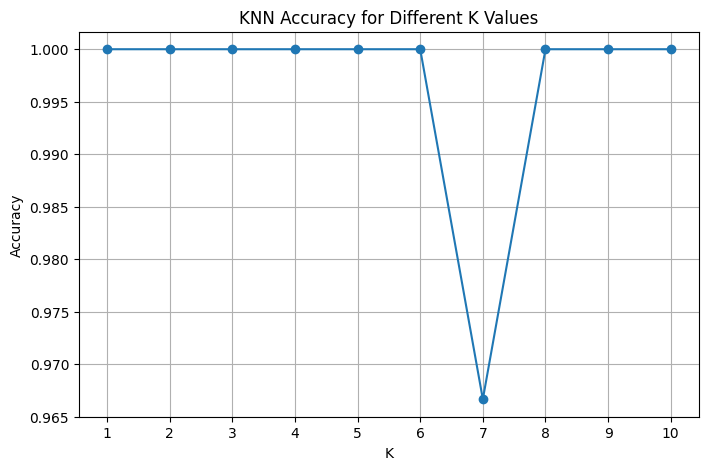

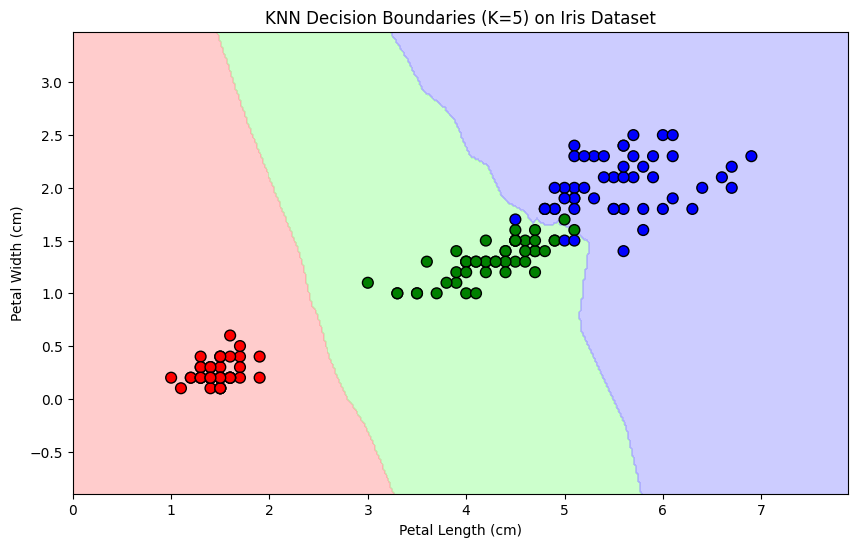

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


df = pd.read_csv("Iris.csv")

X = df.iloc[:, 1:5].values  
y = LabelEncoder().fit_transform(df['Species'])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}: Accuracy={acc:.2f}")
    print(f"Confusion Matrix:\n{cm}\n")

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

X_vis = df[['PetalLengthCm', 'PetalWidthCm']].values
y_vis = y

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=ListedColormap(cmap_bold), s=60, edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KNN Decision Boundaries (K=5) on Iris Dataset')
plt.show()
